Câu 1: Hãy viết câu lệnh SQL để tính sự tương quan giữa A và B theo công thức sau: 

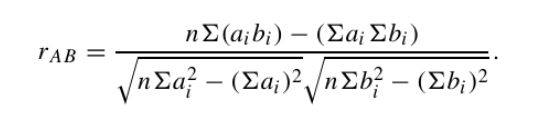

In [ ]:
SELECT 
    (COUNT(*) * SUM(A * B) - SUM(A) * SUM(B)) / 
    (SQRT(COUNT(*) * SUM(A * A) - SUM(A) * SUM(A)) * SQRT(COUNT(*) * SUM(B * B) - SUM(B) * SUM(B))) AS correlation
FROM data
WHERE A IS NOT NULL AND B IS NOT NULL;

Câu 2: Một công ty oto đang kiểm tra 3 loại mẫu mới A, B và C trong 4 ngày, và chấm điểm theo thang từ 1
đến 10 điểm cho mỗi ngày với bảng sau. Liệu có sự khác biệt đáng kể giữa các mẫu dựa trên điểm số mà
chúng nhận được trong 4 ngày thử nghiệm không? Kết quả thử nghiệm phụ thuộc vào ngày hay phụ thuộc vào
mẫu xe? Hãy chuyển đổi dữ liệu sang dạng quan hệ và thực hiện kiểm tra χ2.

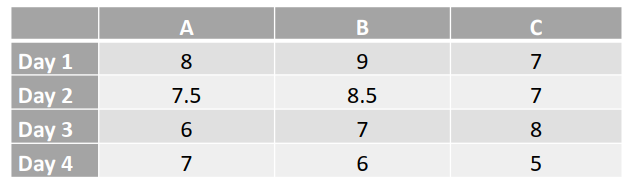

In [5]:
import sqlite3
import pandas as pd
import scipy.stats as stats

# Kết nối SQLite 
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Tạo bảng dữ liệu
cursor.execute("""
    CREATE TABLE car_tests (
        Day TEXT,
        Model TEXT,
        Score REAL
    )
""")

# Dữ liệu thử nghiệm
data = [
    ("Day 1", "A", 8), ("Day 1", "B", 9), ("Day 1", "C", 7),
    ("Day 2", "A", 7.5), ("Day 2", "B", 8.5), ("Day 2", "C", 7),
    ("Day 3", "A", 6), ("Day 3", "B", 7), ("Day 3", "C", 8),
    ("Day 4", "A", 7), ("Day 4", "B", 6), ("Day 4", "C", 5)
]

# Chèn dữ liệu vào bảng
cursor.executemany("INSERT INTO car_tests VALUES (?, ?, ?)", data)
conn.commit()
# Truy vấn dữ liệu từ SQLite
query = "SELECT Day, Model, Score FROM car_tests"
df = pd.read_sql_query(query, conn)

# Chuyển dữ liệu thành bảng tần suất 
table = pd.pivot_table(df, values="Score", index="Day", columns="Model", aggfunc="sum")
# Kiểm định Chi-square
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table)

# In kết quả
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=table.index, columns=table.columns))
# Kiểm tra kết quả
alpha = 0.05
if p_value < alpha:
    print("Có sự khác biệt đáng kể giữa các mẫu xe.")
else:
    print("Không có đủ bằng chứng để khẳng định sự khác biệt giữa các mẫu xe.")

# Đóng kết nối SQLite
conn.close()


Chi-square Statistic: 0.826439691310499
P-value: 0.9913459315666546
Degrees of Freedom: 6
Expected Frequencies:
Model         A         B         C
Day                                
Day 1  7.953488  8.511628  7.534884
Day 2  7.622093  8.156977  7.220930
Day 3  6.959302  7.447674  6.593023
Day 4  5.965116  6.383721  5.651163
Không có đủ bằng chứng để khẳng định sự khác biệt giữa các mẫu xe.


vì giá trị p-value rất lớn (0.9913 > 0.05) nên không có đủ bằng chứng để bác bỏ giả thuyết Ho, tức là kết quả thử nghiệm không phụ thuộc vào mẫu xe hay ngày thử nghiệm

Câu 3: Bảng flights(departure_time,...) chứa các giá trị thời gian dưới dạng số nguyên  ví dụ 830 cho 8:30AM, 1445 cho 2:45PM).Hãy chuyển dổi các giá trị này thành định dạng thời gian.

In [72]:
import sqlite3
import random

# Kết nối đến SQLite 
conn = sqlite3.connect("flights.db")
cursor = conn.cursor()

# Tạo bảng flights
cursor.execute("""
CREATE TABLE IF NOT EXISTS flights (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    departure_time_int INTEGER,
    departure_time_str TEXT
)
""")

# Xoá sạch dữ liệu cũ để mỗi lần chạy có kết quả ngẫu nhiên khác
cursor.execute("DELETE FROM flights")

# Hàm tạo thời gian ngẫu nhiên
def generate_time():
    hour = random.randint(0, 23)
    minute = random.randint(0, 59)
    return hour * 100 + minute

# Chuyển đổi sang định dạng thời gian chuẩn
def convert_to_time(time_int):
    hour = time_int // 100
    minute = time_int % 100
    return f"{hour:02d}:{minute:02d}"

# Tạo và chèn dữ liệu mới
num_samples = 100
departure_times = [(generate_time(),) for _ in range(num_samples)]
departure_times = [(t[0], convert_to_time(t[0])) for t in departure_times]

cursor.executemany("INSERT INTO flights (departure_time_int, departure_time_str) VALUES (?, ?)", departure_times)
conn.commit()

# Truy vấn dữ liệu 
cursor.execute("SELECT id, departure_time_int, departure_time_str FROM flights LIMIT 50")
rows = cursor.fetchall()

# Hiển thị kết quả
print("ID | Departure Time (Int) | Departure Time (Str)")
print("-" * 40)
for row in rows:
    print(f"{row[0]:<3} | {row[1]:<18} | {row[2]}")

# Đóng kết nối
conn.close()


ID | Departure Time (Int) | Departure Time (Str)
----------------------------------------
1601 | 751                | 07:51
1602 | 148                | 01:48
1603 | 54                 | 00:54
1604 | 1641               | 16:41
1605 | 417                | 04:17
1606 | 425                | 04:25
1607 | 456                | 04:56
1608 | 1449               | 14:49
1609 | 2113               | 21:13
1610 | 1507               | 15:07
1611 | 2215               | 22:15
1612 | 1801               | 18:01
1613 | 621                | 06:21
1614 | 2140               | 21:40
1615 | 1415               | 14:15
1616 | 1903               | 19:03
1617 | 2010               | 20:10
1618 | 2019               | 20:19
1619 | 13                 | 00:13
1620 | 1140               | 11:40
1621 | 2019               | 20:19
1622 | 2316               | 23:16
1623 | 626                | 06:26
1624 | 1856               | 18:56
1625 | 453                | 04:53
1626 | 927                | 09:27
1627 | 1143               

Câu 4: Viết truy vấn SQL để tìm các ngoại lệ bằng cách sử dụng MAD. Một quy tắc chung là xem xét các giá trị ngoại lẹ lớn hơn 1.5 lần so với giá trị MAD, trong đó x là số độ lệch chuẩn mà ta coi là có ý nghĩa.

In [74]:
import sqlite3
import random
import pandas as pd

# Kết nối tới cơ sở dữ liệu SQLite 
conn = sqlite3.connect(':memory:')  
cursor = conn.cursor()

# Tạo bảng
cursor.execute('''
CREATE TABLE data (
    id INTEGER PRIMARY KEY,
    value REAL
);
''')

# Chèn dữ liệu ngẫu nhiên vào bảng
for i in range(100):
    value = round(random.uniform(0, 100), 2)  
    cursor.execute('INSERT INTO data (id, value) VALUES (?, ?)', (i + 1, value))

# Tính giá trị trung vị (Median) sử dụng ROW_NUMBER()
cursor.execute('''
WITH RankedData AS (
    SELECT value,
           ROW_NUMBER() OVER (ORDER BY value) AS row_num,
           COUNT(*) OVER () AS total_count
    FROM data
)
SELECT value
FROM RankedData
WHERE row_num = (total_count + 1) / 2;
''')
median_value = cursor.fetchone()[0]

# Tính độ lệch tuyệt đối 
cursor.execute('''
WITH RankedData AS (
    SELECT value,
           ROW_NUMBER() OVER (ORDER BY value) AS row_num,
           COUNT(*) OVER () AS total_count
    FROM data
),
deviation AS (
    SELECT value, ABS(value - (SELECT value FROM RankedData WHERE row_num = (total_count + 1) / 2)) AS abs_deviation
    FROM RankedData
)
SELECT abs_deviation FROM deviation;
''')

# Lấy tất cả các độ lệch tuyệt đối và tính MAD
deviations = [row[0] for row in cursor.fetchall()]
mad_value = sorted(deviations)[len(deviations) // 2]  # MAD là trung vị của độ lệch tuyệt đối

# In giá trị MAD
print(f"Giá trị MAD: {mad_value}")

# Tạo danh sách ngoại lệ và không phải ngoại lệ
cursor.execute('''
WITH RankedData AS (
    SELECT value,
           ROW_NUMBER() OVER (ORDER BY value) AS row_num,
           COUNT(*) OVER () AS total_count
    FROM data
),
deviation AS (
    SELECT value, ABS(value - (SELECT value FROM RankedData WHERE row_num = (total_count + 1) / 2)) AS abs_deviation
    FROM RankedData
)
SELECT id, value, ABS(value - (SELECT value FROM RankedData WHERE row_num = (total_count + 1) / 2)) AS abs_deviation
FROM data;
''')

# Lấy kết quả
rows = cursor.fetchall()

# Phân loại ngoại lệ và không phải ngoại lệ
outliers = []
non_outliers = []

for row in rows:
    id, value, abs_deviation = row
    if abs_deviation > 1.5 * mad_value:
        outliers.append((id, value))
    else:
        non_outliers.append((id, value))

# Tạo DataFrame từ các danh sách ngoại lệ và không phải ngoại lệ
df_outliers = pd.DataFrame(outliers, columns=['id', 'Ngoại lệ'])
df_non_outliers = pd.DataFrame(non_outliers, columns=['id', 'Không phải ngoại lệ'])
df_combined = pd.merge(df_outliers, df_non_outliers, left_index=True, right_index=True, how='outer')

# in toàn bộ DataFrame
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các dòng
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.set_option('display.width', None)  # Không giới hạn chiều rộng hiển thị
print("\nDataFrame chứa giá trị ngoại lệ và không phải ngoại lệ:")
print(df_combined)

# Đóng kết nối
conn.close()


Giá trị MAD: 27.370000000000005

DataFrame chứa giá trị ngoại lệ và không phải ngoại lệ:
     id_x  Ngoại lệ  id_y  Không phải ngoại lệ
0    15.0     94.01     1                77.93
1    17.0     99.87     2                64.07
2    19.0     88.39     3                75.02
3    20.0     95.73     4                 7.68
4    22.0     99.14     5                20.87
5    25.0     89.22     6                76.42
6    39.0     91.25     7                46.41
7    45.0     91.66     8                82.04
8    46.0      2.29     9                42.20
9    56.0     97.23    10                38.84
10   58.0      3.44    11                34.86
11   67.0     99.59    12                77.47
12   76.0      2.33    13                46.11
13   84.0      4.79    14                73.25
14  100.0     96.71    16                14.17
15    NaN       NaN    18                87.87
16    NaN       NaN    21                81.22
17    NaN       NaN    23                12.11
18    NaN       Na

Câu 5 : hãy xác định liệu hai người trong bảng Patient(last_name, weight, height) có phải là một người hay không bằng cách sử dụng khảng cách kết hợp BOOLEAN trên "last_name" và " weight"

In [76]:
import sqlite3
import random
import string

# Kết nối tới cơ sở dữ liệu SQLite 
conn = sqlite3.connect(':memory:')  
cursor = conn.cursor()

# Tạo bảng Patient
cursor.execute('''
CREATE TABLE Patient (
    id INTEGER PRIMARY KEY,
    last_name TEXT,
    weight REAL,
    height REAL
);
''')

# Hàm tạo tên ngẫu nhiên tên từ A-Z 
def generate_random_name():
    length = random.randint(3, 8)  
    return ''.join(random.choices(string.ascii_uppercase, k=length))  # Chọn ngẫu nhiên các chữ cái từ A-Z

# Chèn dữ liệu ngẫu nhiên vào bảng Patient
for i in range(10):
    last_name = generate_random_name()  # Tạo tên ngẫu nhiên
    weight = round(random.uniform(50, 100), 1)  # Số ngẫu nhiên từ 50 đến 100
    height = round(random.uniform(150, 190), 1)  # Số ngẫu nhiên từ 150 đến 190
    cursor.execute('INSERT INTO Patient (last_name, weight, height) VALUES (?, ?, ?)', 
                   (last_name, weight, height))

# Lấy tất cả các cặp Patient từ bảng để kiểm tra 
cursor.execute('SELECT * FROM Patient')
patients = cursor.fetchall()

# Kiểm tra sự tương đồng giữa các cặp bệnh nhân dựa trên last_name và weight
matches = []

for i in range(len(patients)):
    for j in range(i + 1, len(patients)):
        patient1 = patients[i]
        patient2 = patients[j]
        
        # Xác định liệu hai người có phải là một người dựa trên last_name và weight
        last_name_match = (patient1[1] == patient2[1])  # So sánh last_name
        weight_match = (patient1[2] == patient2[2])  # So sánh weight
        
        # Nếu cả hai đều giống nhau, coi là một người
        if last_name_match and weight_match:
            matches.append((patient1, patient2, True))  # Hai người là một người
        else:
            matches.append((patient1, patient2, False))  # Hai người không phải là một người

# In kết quả
print("Kết quả so sánh:")
for match in matches:
    patient1, patient2, is_same_person = match
    print(f"Patient 1 (ID: {patient1[0]}): {patient1[1]}, {patient1[2]}kg, {patient1[3]}cm")
    print(f"Patient 2 (ID: {patient2[0]}): {patient2[1]}, {patient2[2]}kg, {patient2[3]}cm")
    print(f"Is same person: {is_same_person}")
    print()

# Đóng kết nối
conn.close()


Kết quả so sánh:
Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 2): OYXFMMCE, 94.8kg, 160.3cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 3): FSFAVCCI, 72.8kg, 184.6cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 4): LED, 79.5kg, 165.8cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 5): XCEXH, 78.9kg, 173.6cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 6): TEOIXV, 54.6kg, 188.0cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 7): HZIOXSX, 95.8kg, 185.4cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 8): WIVBYGYR, 87.9kg, 177.4cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 9): GGYKSZD, 78.9kg, 160.1cm
Is same person: False

Patient 1 (ID: 1): NSGZJT, 88.4kg, 166.1cm
Patient 2 (ID: 10): LRJHFOD, 57.7kg, 157.6cm
Is same person: Fal